### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)  # adds a nice background to the graphs
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
rating  = pd.read_csv('Data.csv')
rating.head()


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
movie = pd.read_csv('item.csv')
movie = movie.rename(columns = {'release date':'release'})
movie.head()

,movie id,movie title,release,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
user  = pd.read_csv('user.csv')
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
print ('')
print ('***RATING***')
print ('')
print ('** RATING: Shape **')
rating.shape


***RATING***

** RATING: Shape **


(100000, 4)

In [6]:
print ('')
print ('** RATING: Info **')
print ('')
rating.info()
print ('')
print ('** RATING: Describe **')
rating.describe()



** RATING: Info **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

** RATING: Describe **


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
print ('** RATING: Numer of Missing Values **')
pd.DataFrame ( rating.isnull().sum(), columns= ['Number of missing values'])

** RATING: Numer of Missing Values **


,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [8]:
print ('')
print ('***MOVIE***')
print ('')
print ('** MOVIE: Shape **')
movie.shape


***MOVIE***

** MOVIE: Shape **


(1681, 22)

In [9]:
print ('')
print ('** MOVIE: Info **')
print ('')
movie.info()
print ('')
print ('** MOVIE: Describe **')
movie.describe()


** MOVIE: Info **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie id     1681 non-null   int64 
 1   movie title  1681 non-null   object
 2   release      1681 non-null   object
 3   unknown      1681 non-null   int64 
 4   Action       1681 non-null   int64 
 5   Adventure    1681 non-null   int64 
 6   Animation    1681 non-null   int64 
 7   Childrens    1681 non-null   int64 
 8   Comedy       1681 non-null   int64 
 9   Crime        1681 non-null   int64 
 10  Documentary  1681 non-null   int64 
 11  Drama        1681 non-null   int64 
 12  Fantasy      1681 non-null   int64 
 13  Film-Noir    1681 non-null   int64 
 14  Horror       1681 non-null   int64 
 15  Musical      1681 non-null   int64 
 16  Mystery      1681 non-null   int64 
 17  Romance      1681 non-null   int64 
 18  Sci-Fi       1681 non-null   int64 
 19  Thrille

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print ('** MOVIE: Numer of Missing Values **')
pd.DataFrame ( movie.isnull().sum(), columns= ['Number of missing values'])

** MOVIE: Numer of Missing Values **


,Number of missing values
movie id,0
movie title,0
release,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [11]:
print ('')
print ('***USER***')
print ('')
print ('** USER: Shape **')
user.shape


***USER***

** USER: Shape **


(943, 5)

In [12]:
print ('')
print ('** USER: Info **')
print ('')
user.info()
print ('')
print ('** USER: Describe **')
user.describe()


** USER: Info **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

** USER: Describe **


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [13]:
print ('** USER: Numer of Missing Values **')
pd.DataFrame ( user.isnull().sum(), columns= ['Number of missing values'])

** USER: Numer of Missing Values **


,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [14]:
# use sum on the default axis
print ('** MOVIE: Numer of Movies per Genre **')
pd.DataFrame ( movie.sum(), columns= ['Number of Movies'])

** MOVIE: Numer of Movies per Genre **


,Number of Movies
movie id,1415136
movie title,Toy Story GoldenEye Four Rooms Get Shorty Copy...
release,01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109


#### 5. Find the movies that have more than one genre - 5 marks

In [15]:
moviegen = pd.read_csv('item.csv')
#            pd.DataFrame ( moviegen, columns= ['Number of Movies'])
moviegen['Genre Total'] = moviegen.iloc [:,3:22].sum(axis=1)
#             moviegen[['movie title' , 'Genre Total']]
moviegen1 = moviegen [ moviegen['Genre Total']>1 ]
moviegen1 [['movie title' , 'Genre Total']]

,movie title,Genre Total
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [16]:
movie.drop(movie[movie['unknown'] > 0].index, inplace = True)
movie.head()



,movie id,movie title,release,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [17]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

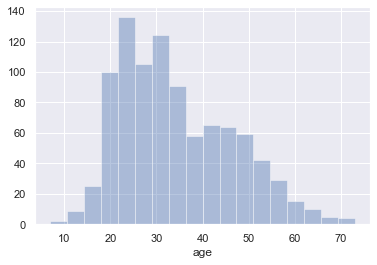

In [18]:
sns.distplot(user['age'], kde=False)

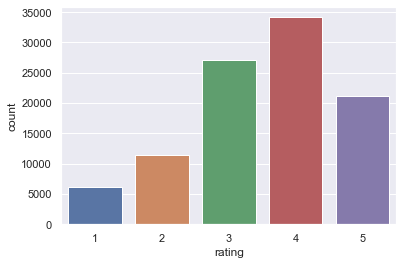

In [19]:
sns.countplot(rating['rating']);

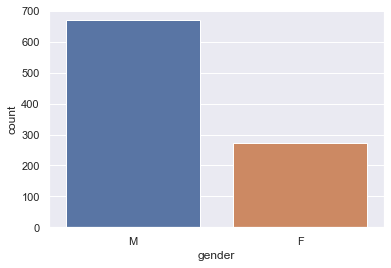

In [20]:
sns.countplot(user['gender']);

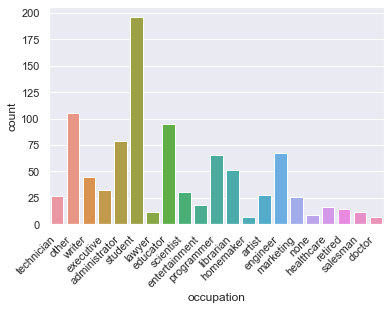

In [21]:
ax = sns.countplot(user['occupation']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [22]:
df = np.split(movie,[2,3], axis=1)
reldate=df[1]
reldate[['Day','Month','Year']] = reldate.release.str.split("-",expand=True,)
reldate


,release,Day,Month,Year
0,01-Jan-1995,01,Jan,1995
1,01-Jan-1995,01,Jan,1995
2,01-Jan-1995,01,Jan,1995
3,01-Jan-1995,01,Jan,1995
4,01-Jan-1995,01,Jan,1995
...,...,...,...,...
1676,06-Feb-1998,06,Feb,1998
1677,06-Feb-1998,06,Feb,1998
1678,01-Jan-1998,01,Jan,1998
1679,01-Jan-1994,01,Jan,1994


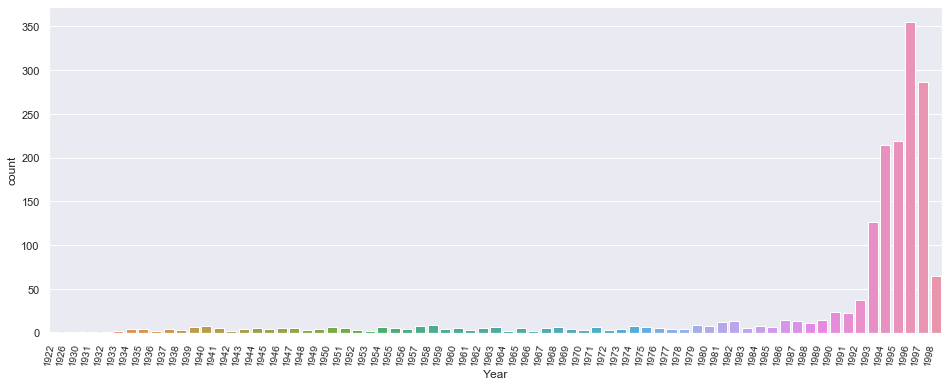

In [23]:
plt.figure(figsize=(16,6)) 
ax=sns.countplot(reldate['Year']);
ax.set_xticklabels(ax.get_xticklabels(),fontsize=10, rotation=80, ha="right")

plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [24]:
f_column = reldate["Year"]
movie = pd.concat([f_column,movie], axis = 1)
movie.tail()

,Year,movie id,movie title,release,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1998,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1998,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1998,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1994,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1680,1996,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Genre_popul = movie.groupby("Year")["Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"].sum()
Genre_popul.tail()

C:\Users\jcbur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1998,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0


Text(0.5, 1, '*** Number of movies x 10 ***')

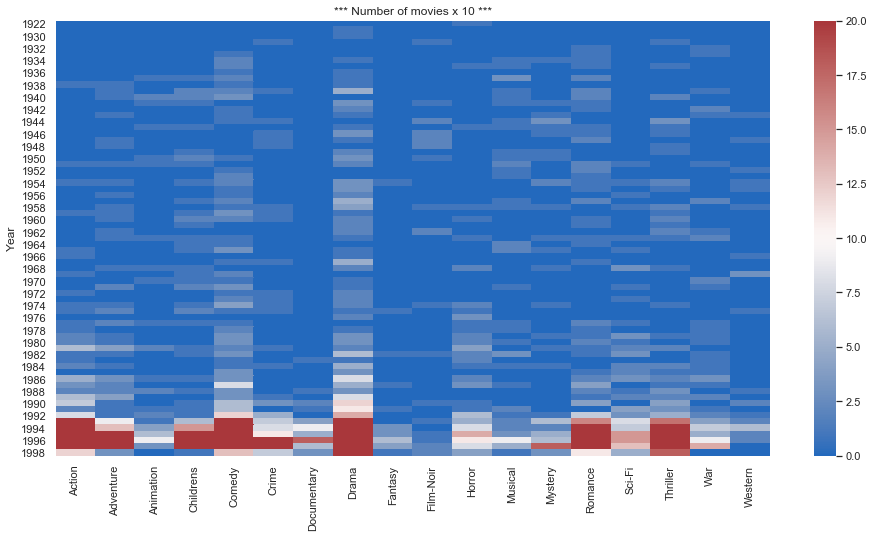

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(Genre_popul, vmin=0, vmax=20, cmap="vlag")
plt.title('*** Number of movies x 10 ***')


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [31]:

#del movieidname

movname = movie[['movie title']]
movieidname = movie[['movie id', 'movie title']]
movieidname = movieidname.rename(columns = {'movie id':'movie_id'})
movieidname = movieidname.rename(columns = {'movie title':'movie_title'})
movieidname

,movie_id,movie_title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat
...,...,...
1676,1678,Mat' i syn
1677,1679,B. Monkey
1678,1680,Sliding Doors
1679,1681,You So Crazy


In [32]:
rating.sort_values(by=['movie id','user id'], inplace=True, ascending=True)
rating1=rating
rating1


,user id,movie id,rating,timestamp
32236,1,1,5,874965758
26184,2,1,4,888550871
1333,5,1,4,875635748
54487,6,1,4,883599478
18504,10,1,4,877888877
...,...,...,...,...
75323,863,1678,1,889289570
67302,863,1679,3,889289491
80394,863,1680,2,889289570
92329,896,1681,3,887160722


In [34]:
#del ratingcount
ratingcount = pd.DataFrame(rating.groupby("movie id")["rating"].count())
ratingcount = ratingcount.rename(columns = {'rating':'rating_count'})
ratingcount

,rating_count
movie id,
1,452
2,131
3,90
4,209
5,86
...,...
1678,1
1679,1
1680,1


In [35]:
#del ratingsum
ratingsum = pd.DataFrame(rating.groupby('movie id')['rating'].sum())
ratingsum = ratingsum.rename(columns = {'rating':'rating_sum'})

ratingsum

,rating_sum
movie id,
1,1753
2,420
3,273
4,742
5,284
...,...
1678,1
1679,3
1680,2


In [36]:
movieidname

,movie_id,movie_title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat
...,...,...
1676,1678,Mat' i syn
1677,1679,B. Monkey
1678,1680,Sliding Doors
1679,1681,You So Crazy


In [41]:

ratingcount = pd.concat([ratingsum , ratingcount], axis = 1)

ratingcount

,rating_sum,rating_count
movie id,,
1,1753,452
2,420,131
3,273,90
4,742,209
5,284,86
...,...,...
1678,1,1
1679,3,1
1680,2,1


In [42]:
ratingaux = pd.DataFrame()

ratingaux=ratingcount['rating_sum']/ratingcount['rating_count']
ratingaux = ratingaux.rename('rating_avg')

ratingaux

movie id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating_avg, Length: 1682, dtype: float64

In [43]:
ratingcount1=pd.DataFrame()

ratingcount1 = pd.concat([ratingcount,ratingaux], axis = 1)
ratingcount1.sort_values(by=['rating_count','rating_avg' ], inplace=True, ascending=False)


ratingcount1


,rating_sum,rating_count,rating_avg
movie id,,,
50,2541,583,4.358491
258,1936,509,3.803536
100,2111,508,4.155512
181,2032,507,4.007890
294,1531,485,3.156701
...,...,...,...
1654,1,1,1.000000
1659,1,1,1.000000
1661,1,1,1.000000


In [44]:
ratingcount1.drop(ratingcount1[ratingcount1['rating_count']<100].index, inplace = True)
ratingcount1.sort_values(by=['rating_avg'], inplace=True, ascending=False)
#ratingsum = ratingsum.rename(columns = {'rating':'rating_sum'})

ratingcount1=ratingcount1.head(25)
print("")
print("")
print("This is the top 25 movies (Movie ID *ONLY*) according to average ratings")
print("")
print("***I didnt have the time nor the knowledge to link Movie ID to Movie Title***")
ratingcount1



This is the top 25 movies (Movie ID *ONLY*) according to average ratings

***I didnt have the time nor the knowledge to link Movie ID to Movie Title***


,rating_sum,rating_count,rating_avg
movie id,,,
408,503,112,4.491071
318,1331,298,4.466443
169,527,118,4.466102
483,1083,243,4.456790
64,1258,283,4.445230
603,917,209,4.387560
12,1171,267,4.385768
50,2541,583,4.358491
178,543,125,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [1]:
#write the conclusions here